In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import numpy as np
import pandas as pd
import argparse
from scipy.integrate import solve_ivp
import pyBigWig as bw
import sys
sys.path.insert(0, '/home/jbreda/PROseq/scripts/FourierTransform')
from fourier_transform import fourier_transform
from multiprocessing import Pool
from functools import partial

import matplotlib.pyplot as plt
sys.path.insert(0, '/home/jbreda/PROseq/scripts/Phase_to_LabColor')
from phase_to_labcolor import phase_to_labcolor as p2lc

In [2]:
infile = '../results/GRCm38/kalman/extended_kalman_on_expressed_regions_bin10000bp.csv'
df = pd.read_csv(infile, sep='\t')

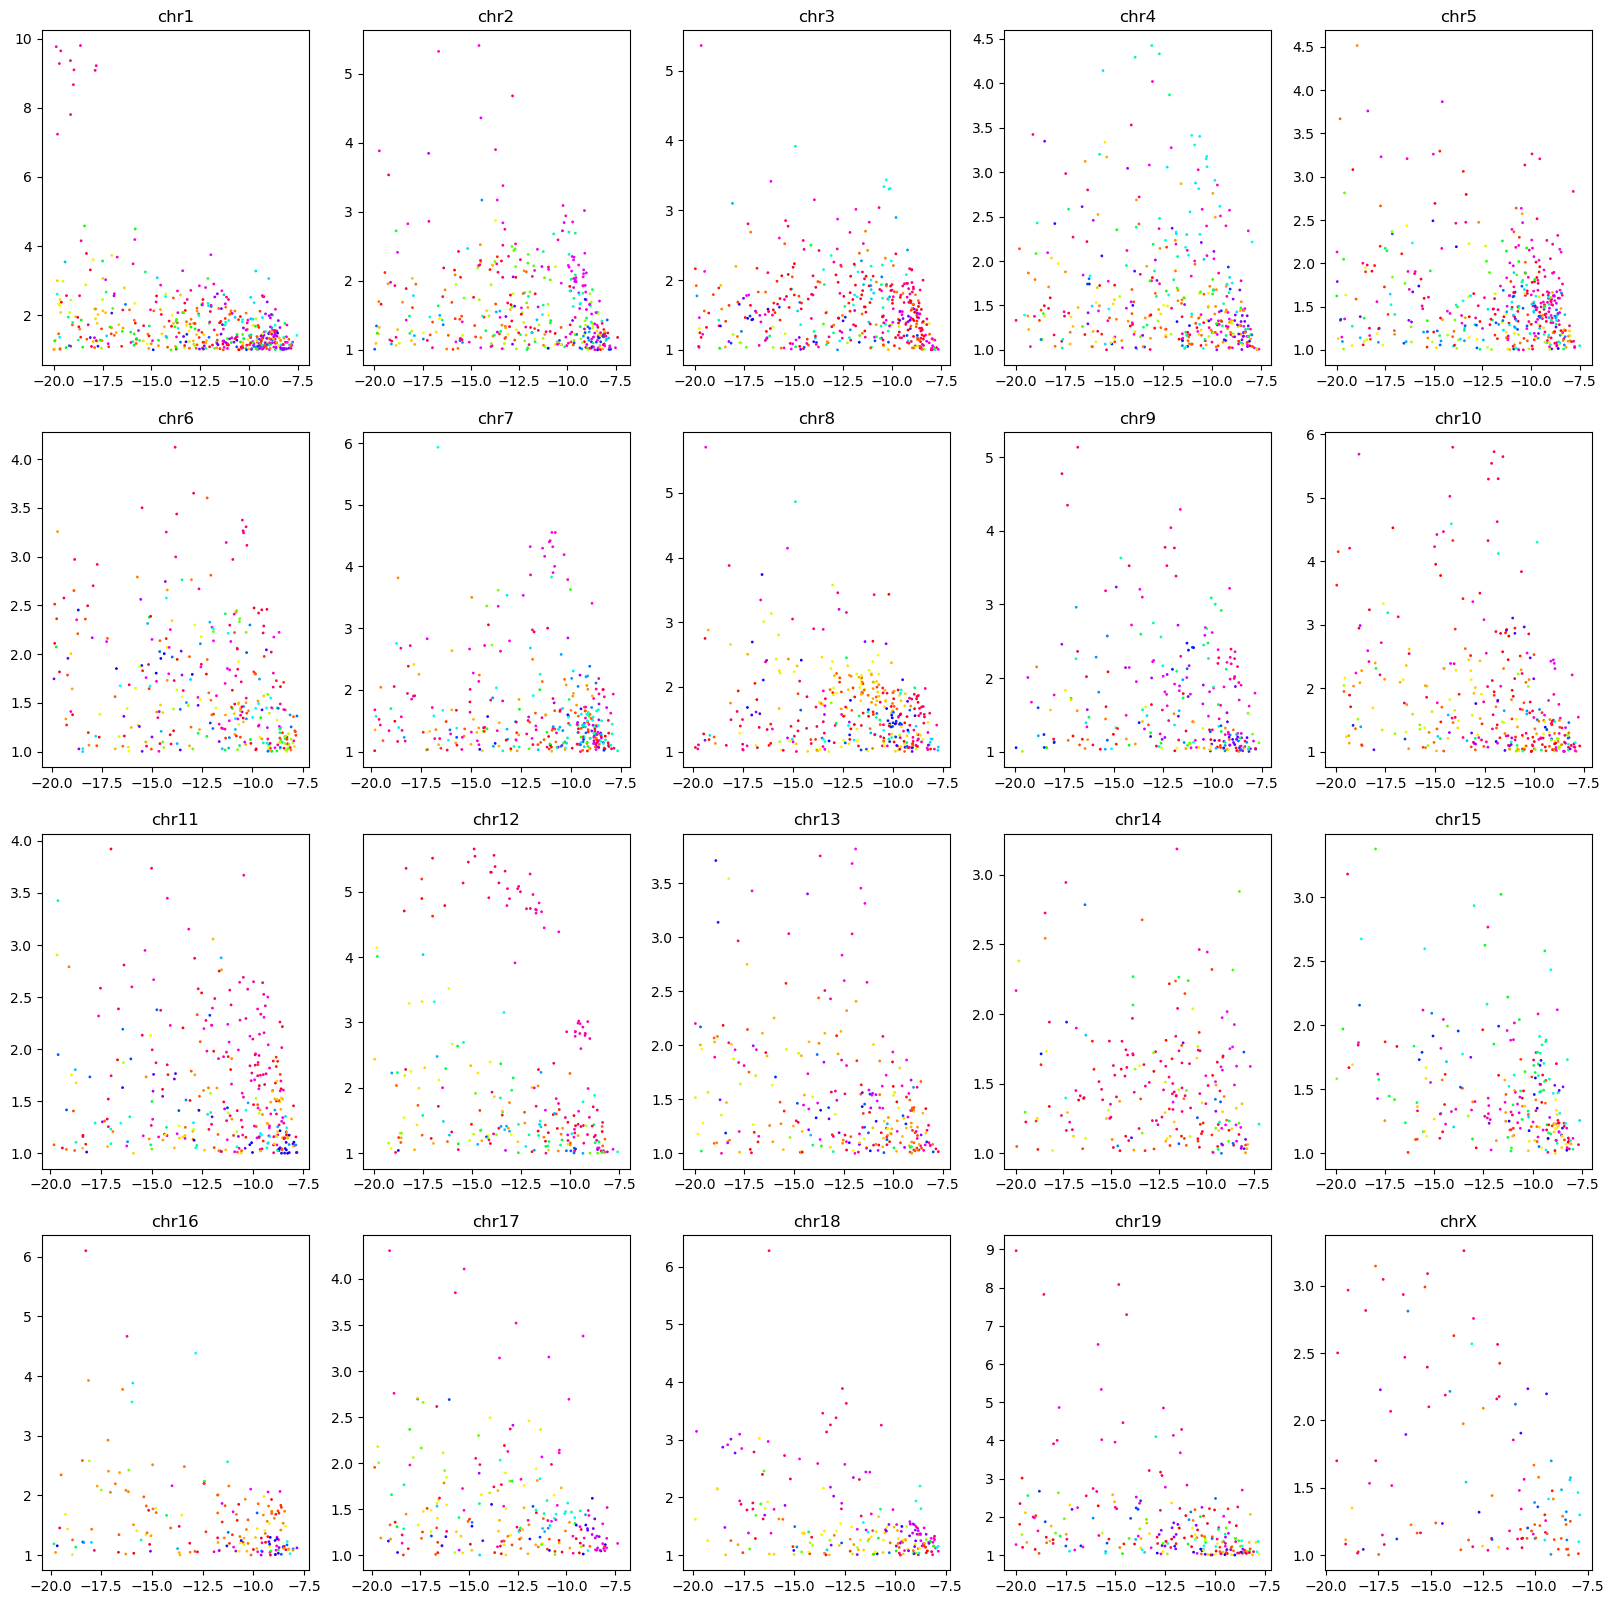

In [3]:
n = df.chr.unique().shape[0]

fig, axes = plt.subplots(4, 5, figsize=(20, 20))
for f,chr in enumerate(df.chr.unique()):
    x = np.array( df[df.chr == chr].LL  )
    y = np.array( df[df.chr == chr].amp )
    φ = np.array( df[df.chr == chr].phi )
    idx = np.where( (x>-20) & (y>1) )[0]

    ax = axes.flatten()[f]
    ax.set_title(chr)
    #ax.scatter(x=df[df.chr == chr].LL, y=df[df.chr == chr].amp, s=1, c=df[df.chr == chr].phi, cmap='hsv')
    #ax.plot(df[df.chr == chr].LL, df[df.chr == chr].amp, c='black', alpha=0.1)
    ax.scatter(x=x[idx], y=y[idx], s=1, c=φ[idx], cmap='hsv')

Text(0.5, 1.0, 'amp vs λ. corr. coeff: 0.1531242940415264')

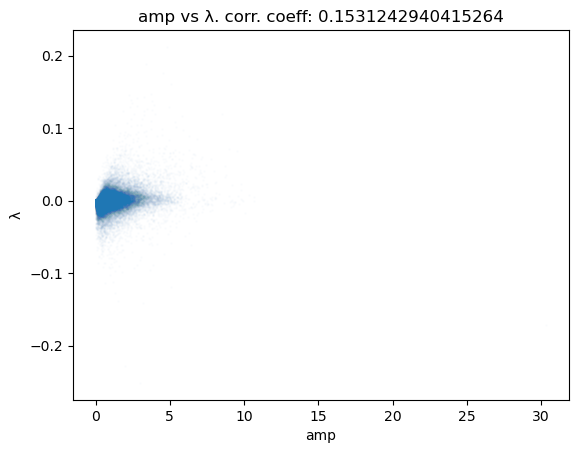

In [42]:
fig, ax = plt.subplots()
df.plot.scatter(x='amp', y='λ', s=1, alpha=.01, ax=ax)
ax.set_title(f'amp vs λ. corr. coeff: {df.amp.corr(df.λ)}')

In [10]:
df

,chr,start,end,strand,LL,a,da,b,db,dab,k,dk,λ,dλ,amp,damp,phi,dphi
0,chr1,8080000,8090000,+,-32.266688,-0.250879,0.001000,-0.723197,0.001000,1.911873e-24,-0.002139,-0.004278,0.000000,0.069315,0.255159,0.014907,1.904710,0.041311
1,chr1,8090000,8100000,+,-33.506413,-0.266117,0.024019,-0.716382,0.829062,3.323677e-01,-0.002159,-0.000421,-0.000096,0.048025,0.254738,0.410666,1.926472,NaN
2,chr1,8100000,8110000,+,-32.255938,-0.275759,0.115028,-0.695284,1.766976,7.431038e-01,-0.002148,0.000101,-0.000572,0.047971,0.249324,0.611756,1.948380,NaN
3,chr1,8130000,8140000,+,-33.687349,-0.307051,1.673470,-0.647499,9.108119,4.038846e+00,-0.002146,0.000548,-0.000599,0.143743,0.238871,1.447576,2.013601,NaN
4,chr1,8140000,8150000,+,-32.274742,-0.314398,2.075022,-0.626596,9.723621,4.554624e+00,-0.002132,0.000232,-0.000093,0.048037,0.233683,1.524172,2.035847,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342577,chrX,165640000,165650000,-,-37.634237,1.955103,36.566833,-0.485106,-0.506625,-9.227627e+00,-0.002141,0.000181,-0.001745,0.047845,0.671462,1.398609,0.243211,NaN
342578,chrX,165650000,165660000,-,-33.580536,2.289144,31.745090,-0.511913,-1.143411,-7.306236e+00,-0.002144,0.000172,-0.001097,0.047783,0.781895,1.332884,0.220007,NaN
342579,chrX,165660000,165670000,-,-33.602085,2.465253,23.650066,-0.500205,-1.442094,-4.924809e+00,-0.002161,0.000100,-0.002080,0.047760,0.838496,1.171815,0.200184,NaN
342580,chrX,165670000,165680000,-,-32.288020,2.691837,11.842176,-0.480614,-0.956368,-2.199892e+00,-0.002169,-0.000424,-0.001929,0.047715,0.911469,0.848922,0.176683,NaN
